# SF-DAT-21 | Unit Project 2

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

### Step 1: Load the python libraries you will need for this project

In [4]:
# imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

### Step 2: Read in your data set

In [5]:
# read in data from source
df_raw = pd.read_csv("../../dataset/admissions.csv")
print df_raw.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset?

In [6]:
df_raw.shape

(400, 4)

## new

In [7]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer:

#### Question 2. Create a summary table.

In [8]:
# function
df_raw.describe().round(3)

,admit,gre,gpa,prestige
count,400.000,398.000,398.000,399.000
mean,0.318,588.040,3.391,2.486
std,0.466,115.629,0.381,0.945
min,0.000,220.000,2.260,1.000
25%,0.000,520.000,3.130,2.000
50%,0.000,580.000,3.395,2.000
75%,1.000,660.000,3.670,3.000
max,1.000,800.000,4.000,4.000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The distribution of GRE scores are flatter than that of GPA

#### Question 4. Drop data points with missing data.


In [9]:
df_nona = df_raw.dropna()
df_nona.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data.  How can you tell?

Answer: can verify the data length. we can also pull the row with nans. 

#### Question 6. Create box plots for GRE and GPA.

In [10]:
df_nona.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


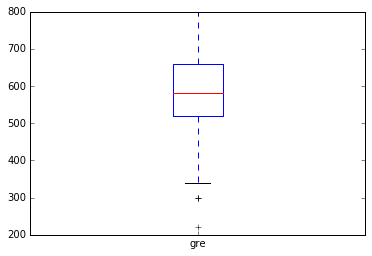

In [11]:
# boxplot 1
df_nona[['gre']].plot(kind = 'box')

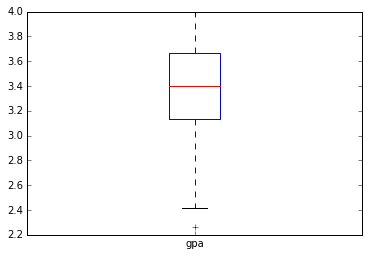

In [12]:
# boxplot 2
df_nona[['gpa']].plot(kind = 'box')

#### Question 7. What do this plots show?

Answer:
1. Two outliers in gre and one outlier in gpa

#### Question 8. Describe each distribution.

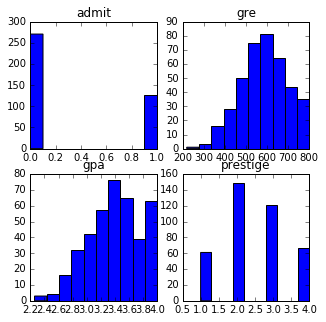

In [26]:
# plot the distribution of each variable

fig = plt.figure(figsize=(5,5))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(df_nona['admit'])
ax2.hist(df_nona['gre'])
ax3.hist(df_nona['gpa'])
ax4.hist(df_nona['prestige'])

ax1.set_title('admit')
ax2.set_title('gre')
ax3.set_title('gpa')
ax4.set_title('prestige')

plt.show()

plt.close()

#### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

Answer:

Transform the data - log transformation or standardize or other methods of transformations, depending on the original distribution of the data. 

#### Question 10. Does this distribution need correction?  If so, why?  How?

Answer:  

The distributions of both gre and gpa are almost normal with just a little skewness to the left. Therefore, I feel that the estimates would not be too biased by using original data. However, we can also try analyzing data using transformed data. If tranformation needed, I recommend standardization. 

#### Question 11. Which of our variables are potentially colinear?
* gpa and gre might be colinear since the correlation between the two is the highest. however, I don't think there's multicollinearity problem in this case since the correlation is only 0.38. Also, gre an gpa may represent different ability and potential. 

In [16]:
# create a correlation matrix for the data
df_nona.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer:
* missing values exist and I did listwise deletion since the data sample is large enough. The statistics results won't be affected much without the three records. However, in this case, I think a better way to deal with missing values is to fill in the blanks with averages so we won't miss any records. 
* outliers on gre and gpa were detected by checking boxplots. We should follow 1.5IQR rule to decide if we should remove them. However, even if the 1.5IQR suggests us to remove the outliers, we should check scatterplots to see if they are influential points. If they are, we cannot simply remove them because of their leverage. 
* We have two categorical variables and two continuous variables. 
    1. For the two categorical variables, the number of observations in each category are uneven but won't bias statistical results since the numbers are enough. 
    2. For the two continous variables, thought there is some skewness but not that serious so we can either leave as it is or do transformations. 
* Correlation matrix suggests there's no multicollinearity problem. Interestingly, prestige has negative correlations with the other three variables. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

Answer:  
* Check the scatter plot between the two variables;
* Check the correlation between the two variables;
* Use chi-square test to test the statistical significance between the two variables since they two are both categorical.

#### Question 14. What is your hypothesis?

Answer:  

H0: There isn't association between admission and prestige of undergraduate schools.  
H1: There is association between admission and prestige of undergraduate schools.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data.

#### 2. Bonus: Log transform the skewed data.

#### 3. Advanced: Impute missing data.